<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2_n20.csv',
 'data_multi_delta_-2_n30.csv',
 'data_multi_delta_-2_n60.csv',
 'data_multi_delta_-2_n120.csv',
 'data_multi_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,84.329507,-0.003495,94.326012,94.330881,-0.004869
1,0.0,1.0,70.214330,-0.014727,80.199603,80.213123,-0.013521
2,0.0,2.0,95.783344,-0.018553,105.764790,105.786812,-0.022022
3,0.0,3.0,62.967454,-0.017873,72.949581,72.964923,-0.015342
4,0.0,4.0,72.284998,0.002363,82.287361,82.284170,0.003190
...,...,...,...,...,...,...,...
119995,999.0,115.0,74.553637,0.022387,84.576024,84.553296,0.022729
119996,999.0,116.0,41.191500,-0.021921,51.169579,51.190767,-0.021188
119997,999.0,117.0,27.359310,0.001875,37.361185,37.358414,0.002771
119998,999.0,118.0,42.405446,-0.037755,52.367691,52.404727,-0.037036


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,84.329507,-0.003495,94.326012,94.330881,-0.004869
1,0.0,1.0,70.214330,-0.014727,80.199603,80.213123,-0.013521
2,0.0,2.0,95.783344,-0.018553,105.764790,105.786812,-0.022022
3,0.0,3.0,62.967454,-0.017873,72.949581,72.964923,-0.015342
4,0.0,4.0,72.284998,0.002363,82.287361,82.284170,0.003190
...,...,...,...,...,...,...,...
119995,999.0,115.0,74.553637,0.022387,84.576024,84.553296,0.022729
119996,999.0,116.0,41.191500,-0.021921,51.169579,51.190767,-0.021188
119997,999.0,117.0,27.359310,0.001875,37.361185,37.358414,0.002771
119998,999.0,118.0,42.405446,-0.037755,52.367691,52.404727,-0.037036


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    84.329507 -0.003495   94.326012   94.330881 -0.004869
      1.0    70.214330 -0.014727   80.199603   80.213123 -0.013521
      2.0    95.783344 -0.018553  105.764790  105.786812 -0.022022
      3.0    62.967454 -0.017873   72.949581   72.964923 -0.015342
      4.0    72.284998  0.002363   82.287361   82.284170  0.003190
...                ...       ...         ...         ...       ...
999.0 115.0  74.553637  0.022387   84.576024   84.553296  0.022729
      116.0  41.191500 -0.021921   51.169579   51.190767 -0.021188
      117.0  27.359310  0.001875   37.361185   37.358414  0.002771
      118.0  42.405446 -0.037755   52.367691   52.404727 -0.037036
      119.0  40.838146  0.006220   50.844365   50.837409  0.006957

[120000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    84.329507 -0.003495   94.326012   94.330881 -0.004869
      1.0    70.214330 -0.014727   80.199603   80.213123 -0.013521
      2.0    95.783344 -0.018553  105.764790  105.786812 -0.022022
      3.0    62.967454 -0.017873   72.949581   72.964923 -0.015342
      4.0    72.284998  0.002363   82.287361   82.284170  0.003190
...                ...       ...         ...         ...       ...
999.0 115.0  74.553637  0.022387   84.576024   84.553296  0.022729
      116.0  41.191500 -0.021921   51.169579   51.190767 -0.021188
      117.0  27.359310  0.001875   37.361185   37.358414  0.002771
      118.0  42.405446 -0.037755   52.367691   52.404727 -0.037036
      119.0  40.838146  0.006220   50.844365   50.837409  0.006957

[120000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,84.329507,-0.003495,94.326012,94.330881,-0.004869
1,0.0,1.0,70.214330,-0.014727,80.199603,80.213123,-0.013521
2,0.0,2.0,95.783344,-0.018553,105.764790,105.786812,-0.022022
3,0.0,3.0,62.967454,-0.017873,72.949581,72.964923,-0.015342
4,0.0,4.0,72.284998,0.002363,82.287361,82.284170,0.003190
...,...,...,...,...,...,...,...
119995,999.0,115.0,74.553637,0.022387,84.576024,84.553296,0.022729
119996,999.0,116.0,41.191500,-0.021921,51.169579,51.190767,-0.021188
119997,999.0,117.0,27.359310,0.001875,37.361185,37.358414,0.002771
119998,999.0,118.0,42.405446,-0.037755,52.367691,52.404727,-0.037036


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    84.329507 -0.003495   94.326012   94.330881 -0.004869
      1.0    70.214330 -0.014727   80.199603   80.213123 -0.013521
      2.0    95.783344 -0.018553  105.764790  105.786812 -0.022022
      3.0    62.967454 -0.017873   72.949581   72.964923 -0.015342
      4.0    72.284998  0.002363   82.287361   82.284170  0.003190
...                ...       ...         ...         ...       ...
999.0 115.0  74.553637  0.022387   84.576024   84.553296  0.022729
      116.0  41.191500 -0.021921   51.169579   51.190767 -0.021188
      117.0  27.359310  0.001875   37.361185   37.358414  0.002771
      118.0  42.405446 -0.037755   52.367691   52.404727 -0.037036
      119.0  40.838146  0.006220   50.844365   50.837409  0.006957

[120000 rows x 5 columns]

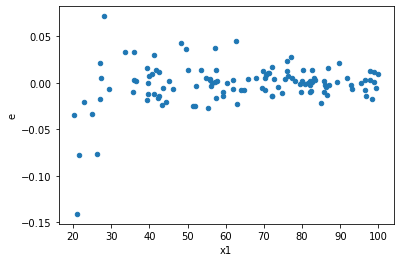

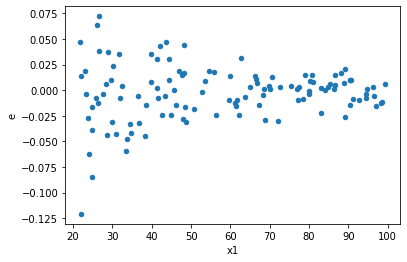

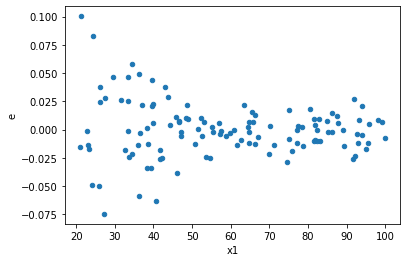

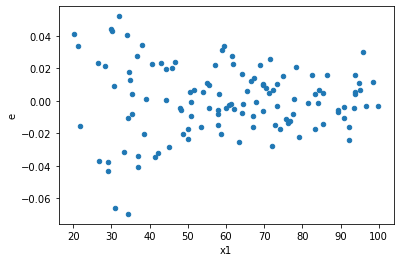

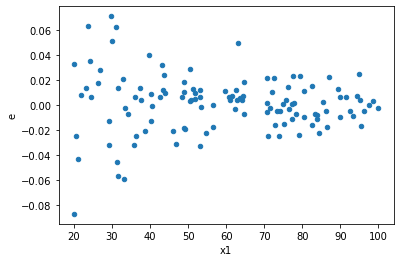

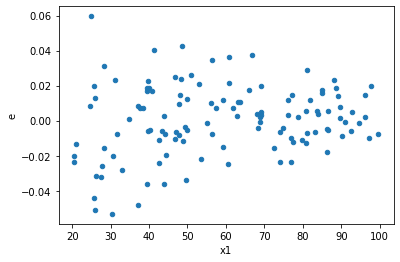

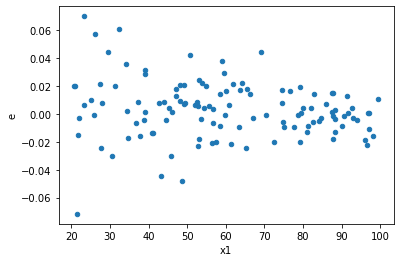

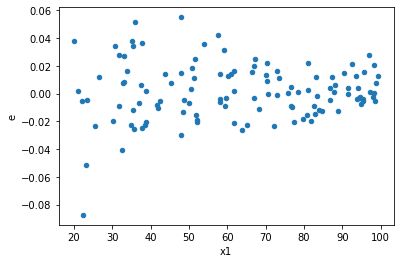

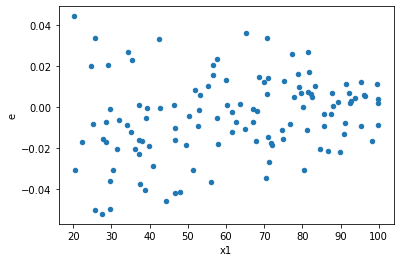

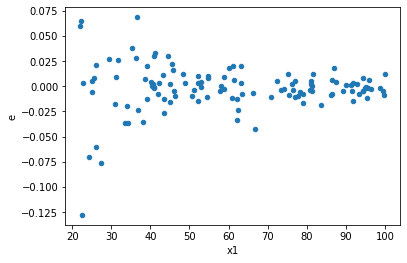

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,47.0,47.0,0.038153351432397745,0.007672267814802538,0.0008117734347318669,0.00016323974074047953,0.2010902719357877,1.854168670190063e-07,Reject005=0 : Heteroscedasticity
1.0,47.0,47.0,0.040814911046483854,0.007548128433724587,0.0008684023626911458,0.0001605984773132891,0.18493556007332884,4.747207898594839e-08,Reject005=0 : Heteroscedasticity
2.0,47.0,47.0,0.05290829316897378,0.0060522494733423905,0.0011257083652973145,0.00012877126539026363,0.11439131959924045,9.29436401592666e-12,Reject005=0 : Heteroscedasticity
3.0,47.0,47.0,0.054282670796575345,0.006980894137707103,0.0011549504424803265,0.00014852966250440645,0.12860262833912592,8.24972602100728e-11,Reject005=0 : Heteroscedasticity
4.0,47.0,47.0,0.04555261261545331,0.00541377583650504,0.0009692045237330492,0.00011518671992563914,0.11884665940474433,1.9072769324660485e-11,Reject005=0 : Heteroscedasticity
5.0,47.0,47.0,0.03434319630490764,0.00480673239579916,0.000730706304359737,0.00010227090203828,0.13996170749873618,3.848227769910869e-10,Reject005=0 : Heteroscedasticity
6.0,47.0,47.0,0.01628174479110001,0.006829798960329057,0.0003464201019382981,0.00014531487149636293,0.41947586379454793,0.0035265770149132815,Reject005=0 : Heteroscedasticity
7.0,47.0,47.0,0.020954140919274444,0.006646537781113153,0.00044583278551647756,0.00014141569747049262,0.31719447753639024,0.00013596252282737042,Reject005=0 : Heteroscedasticity
8.0,47.0,47.0,0.07805008496299648,0.0076817328242106695,0.0016606401055956697,0.00016344112391937594,0.09842055684952267,5.18740217001822e-13,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64